In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

인풋 이미지 사이즈 : (280, 450, 3)
아웃풋 이미지 사이즈 :(282, 452, 3)
패딩_인풋 이미지 사이즈 : (284, 454, 3)
패딩_인풋 이미지 사이즈(채널) :(284, 454)
아웃풋 이미지 사이즈(채널b) :(282, 452)
아웃풋 이미지 사이즈(채널g) :(282, 452)
아웃풋 이미지 사이즈(채널r) :(282, 452)


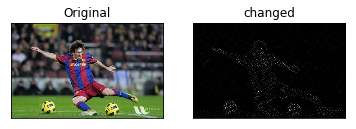

In [8]:
#def convolve(image, kernel, padding, stride):
padding = 2
stride = 1

image = cv2.imread('messi5.jpg')
(input_H, input_W, iput_C) = image.shape[0:3]#가로크기,세로크기,채널수를 각각의 변수에 대입
print("인풋 이미지 사이즈 : " + str(image.shape))

kernel = np.array([[1,0,-1],[0,0,0],[-1,0,1]])#필터 임의 지정
(kernel_H, kernel_W) = kernel.shape[0:2]

output_H=int((input_H+2*padding-kernel_H)/stride+1)#*패딩하지 않은 인풋에서 추출해야함*
output_W=int((input_W+2*padding-kernel_W)/stride+1)#아웃풋 크기 지정을 위한 변수
output_C=image.shape[2]

output=np.zeros((output_H, output_W, output_C), dtype="float32")#아웃풋크기지정
print("아웃풋 이미지 사이즈 :" + str(output.shape))

image = cv2.copyMakeBorder(image, padding, padding, padding, padding,cv2.BORDER_REPLICATE)
#이미지 패딩#

b,g,r = cv2.split(image)#패딩한 이미지의 채널 쪼개기
output_b,output_g,output_r = cv2.split(output)#아웃풋 이미지의 채널 쪼개기


for y in np.arange(0, output_H):
    for x in np.arange(0, output_W):
        roi = b[y:kernel_H+y , x:kernel_W+x]
        k = (roi*kernel).sum()
        if (k<0): 
            output_b[y,x] = 0
        else:
            output_b[y, x] = k
        
        #print("                              y=" + str(y) + ", x=" + str(x))
        #print("패딩된 추출된 인풋 채널 size : " + str(b.shape))
        #print("                  커널 크기 : " + str(kernel_W) + "*" + str(kernel_H))
        #print("                          k : " + str(k))
        #print(" ")

for y in np.arange(0, output_H):
    for x in np.arange(0, output_W):
        roi = g[y:kernel_H+y , x:kernel_W+x]
        k = (roi*kernel).sum()
        if (k<0):
            output_g[y,x] = 0
        else:
            output_g[y, x] = k
        

for y in np.arange(0, output_H):
    for x in np.arange(0, output_W):
        roi = r[y:kernel_H+y , x:kernel_W+x]
        k = (roi*kernel).sum()
        if (k<0):
            output_r[y,x] = 0
        else:
            output_r[y, x] = k
        
print("패딩_인풋 이미지 사이즈 : " + str(image.shape))    
print("패딩_인풋 이미지 사이즈(채널) :" + str(b.shape))
print("아웃풋 이미지 사이즈(채널b) :" + str(output_b.shape))
print("아웃풋 이미지 사이즈(채널g) :" + str(output_g.shape))
print("아웃풋 이미지 사이즈(채널r) :" + str(output_r.shape))

output=cv2.merge((output_b.astype('uint8'),output_g.astype('uint8'),output_r.astype('uint8')))

plt.subplot(121),plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB)),plt.title('changed')
plt.xticks([]), plt.yticks([])
plt.show()